In [11]:
import pandas as pd

# this function is used to display tables in a neat way
from IPython.display import display

In [12]:
# read the csv files
apple=pd.read_csv('apple.csv')
microsoft=pd.read_csv('microsoft.csv')

In [13]:
# take a look at the shape and first few rows of each dataset
print (apple.shape)
print (microsoft.shape)

display (apple.head())
display (microsoft.head())

(8640, 6)
(7312, 6)


,Date,Open,High,Low,Close,Volume
0,2015-02-23,130.02,133.00,129.66,133.00,67871830.0
1,2015-02-20,128.62,129.50,128.05,129.50,48948419.0
2,2015-02-19,128.48,129.03,128.33,128.45,37362381.0
3,2015-02-18,127.62,128.78,127.45,128.72,44891737.0
4,2015-02-17,127.49,128.88,126.92,127.83,63152405.0


,Date,Open,High,Low,Close,Volume
0,2015-02-23,43.70,44.19,43.65,44.15,32518754.0
1,2015-02-20,43.51,43.88,43.29,43.86,29721133.0
2,2015-02-19,43.18,43.53,43.05,43.50,27603420.0
3,2015-02-18,43.63,43.70,43.39,43.53,27111657.0
4,2015-02-17,43.97,44.00,43.19,43.58,33695749.0


In [14]:
# here we join the datasets together.  This is done so in the next step we can see both on the same plot 
fboth=apple.join(microsoft, lsuffix='apple', rsuffix='microsoft')
display(fboth.head())

,Dateapple,Openapple,Highapple,Lowapple,Closeapple,Volumeapple,Datemicrosoft,Openmicrosoft,Highmicrosoft,Lowmicrosoft,Closemicrosoft,Volumemicrosoft
0,2015-02-23,130.02,133.00,129.66,133.00,67871830.0,2015-02-23,43.70,44.19,43.65,44.15,32518754.0
1,2015-02-20,128.62,129.50,128.05,129.50,48948419.0,2015-02-20,43.51,43.88,43.29,43.86,29721133.0
2,2015-02-19,128.48,129.03,128.33,128.45,37362381.0,2015-02-19,43.18,43.53,43.05,43.50,27603420.0
3,2015-02-18,127.62,128.78,127.45,128.72,44891737.0,2015-02-18,43.63,43.70,43.39,43.53,27111657.0
4,2015-02-17,127.49,128.88,126.92,127.83,63152405.0,2015-02-17,43.97,44.00,43.19,43.58,33695749.0


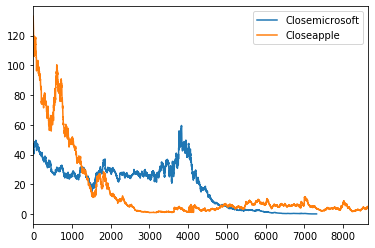

In [15]:
# now let's plot microsoft and apple closing price on the same plot
%matplotlib inline
fboth.plot.line(y=['Closemicrosoft', 'Closeapple'])